1. Load and Profile Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os
from io import StringIO
from scipy.stats import zscore

In [2]:
# Replace with your dataset path, e.g., 'togo-solar-data.csv'
df = pd.read_csv("../data/sierraleone-solar-data.csv", skiprows=[1], encoding="utf-8")
df.columns = df.columns.str.strip()
# Display first 5 rows
print(df.head())
# Column names and data types
print(df.info())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.frame.

2. Summary Statistics & Missing-Value Report

In [3]:
# Summary statistics for numeric columns
print(df.describe())
# Missing value counts
print(df.isna().sum())
# Percentage of missing values
missing_percent = df.isna().mean() * 100
print("\nColumns with >5% missing values:")
print(missing_percent[missing_percent > 5])

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

3. Outlier Detection and Basic Cleaning

In [4]:


# Columns to check for outliers
cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Ensure the columns are numeric
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

# Calculate Z-scores
z_scores = df[cols].apply(zscore, nan_policy="omit")

# Flag rows where any |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of rows with outliers (|Z| > 3): {outliers.sum()}")

# Display outlier rows (optional)
print(df[outliers].head())

Number of rows with outliers (|Z| > 3): 16292
            Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
653  2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654  2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655  2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
656  2021-10-30 10:57  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
657  2021-10-30 10:58  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   

     WSgust  WSstdev     WD  WDstdev    BP  Cleaning  Precipitation  TModA  \
653     1.1      0.5   81.4      7.9  1002         0            0.0   50.4   
654     2.4      0.4   74.6     12.1  1002         0            0.0   51.6   
655     2.1      0.5   66.4     14.6  1002         0            0.0   52.4   
656     1.6      0.6   90.2      7.0  1002         0            0.0   53.4   
657     1.6      0.6  108.5      7.9  1002         0            0.0   54.6   

     TModB  Comments  

In [5]:
# Handle Missing Values:
# Impute missing values with median for key columns
for col in cols:
    if df[col].isna().mean() < 0.05:  # Less than 5% missing
        df[col] = df[col].fillna(df[col].median())
    else:
        print(f"{col} has >5% missing, review before imputing.")
# Drop rows with missing values in critical columns (if needed)
df.dropna(subset=['GHI', 'DNI', 'DHI'], inplace=True)
# Verify no missing values in key columns
print(df[cols].isna().sum())

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [6]:
# Export Cleaned Data:
# Save cleaned DataFrame
df.to_csv("../data/sierraleone_clean.csv", index=False)
print("Cleaned data saved to data/sierraleone_clean.csv")

Cleaned data saved to data/sierraleone_clean.csv


3. Time Series Analysis

In [7]:
# Convert Timestamp:
# Filter out invalid datetime strings
df = df[df['Timestamp'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}', na=False)]
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.set_index('Timestamp', inplace=True)

<Figure size 1200x600 with 0 Axes>

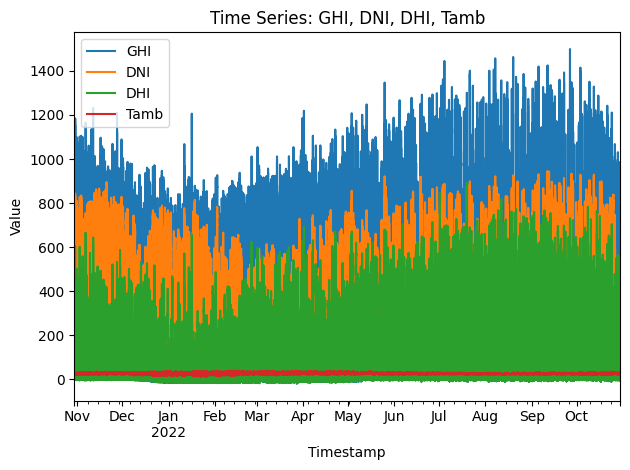

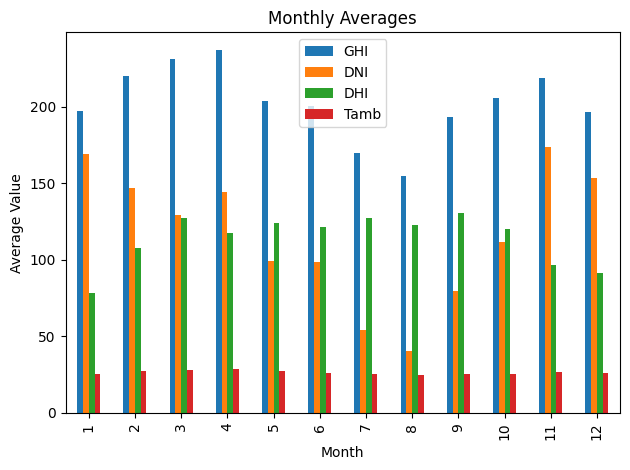

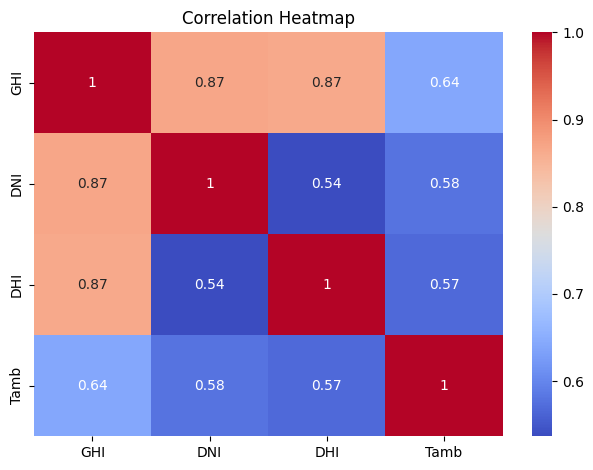

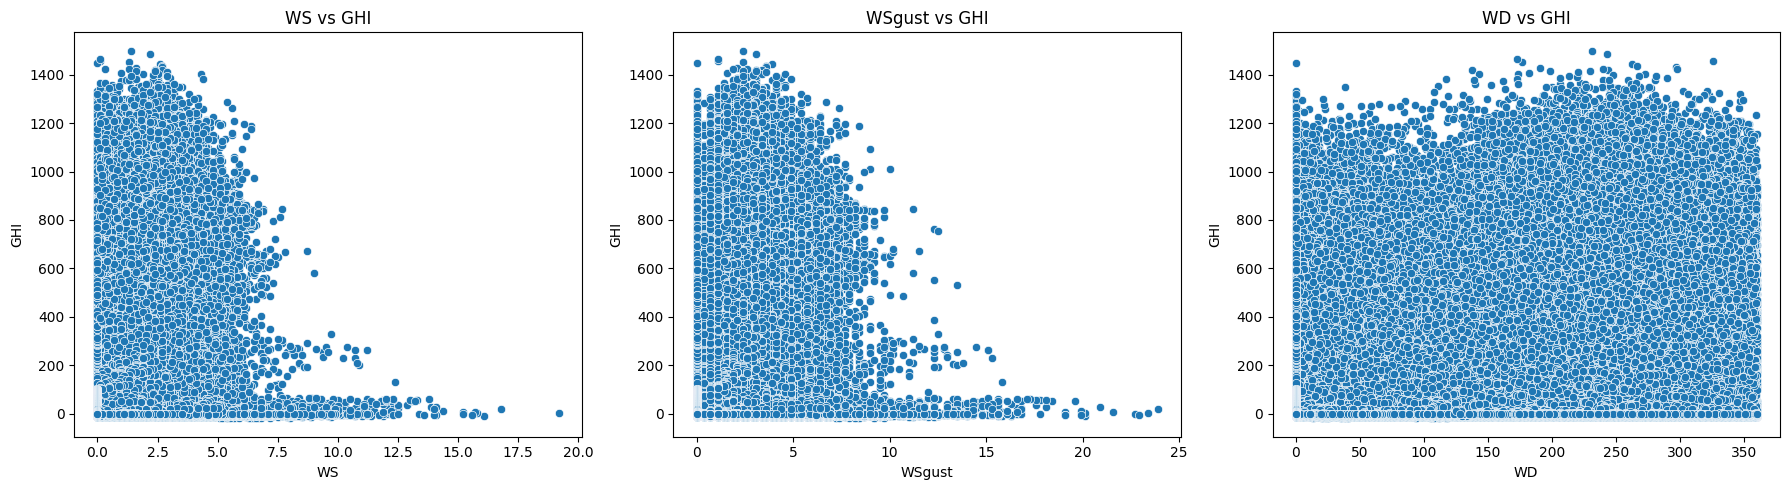

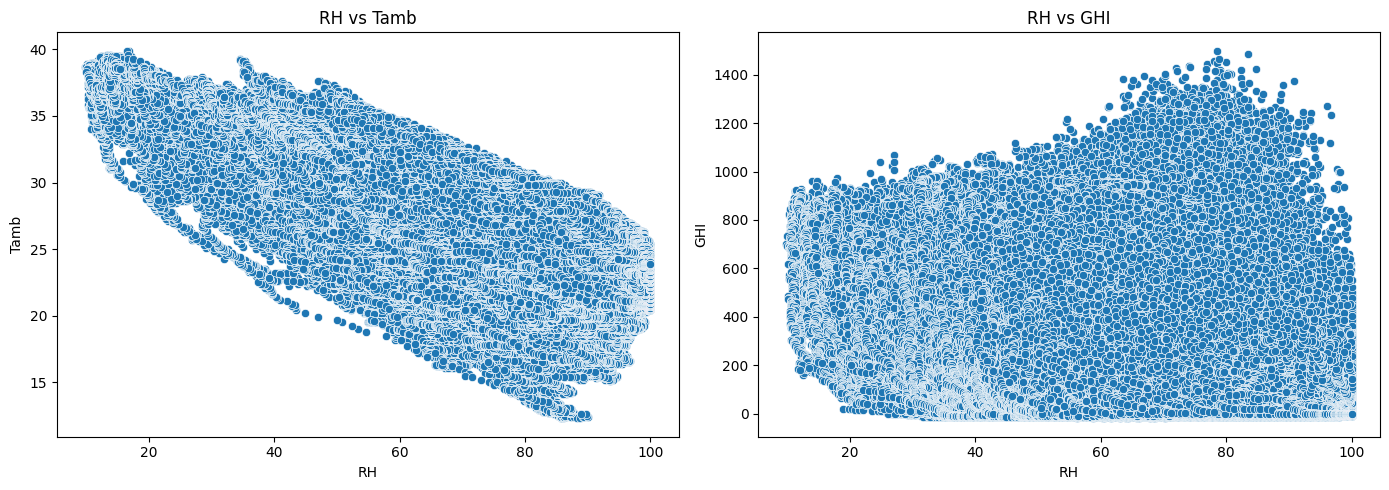

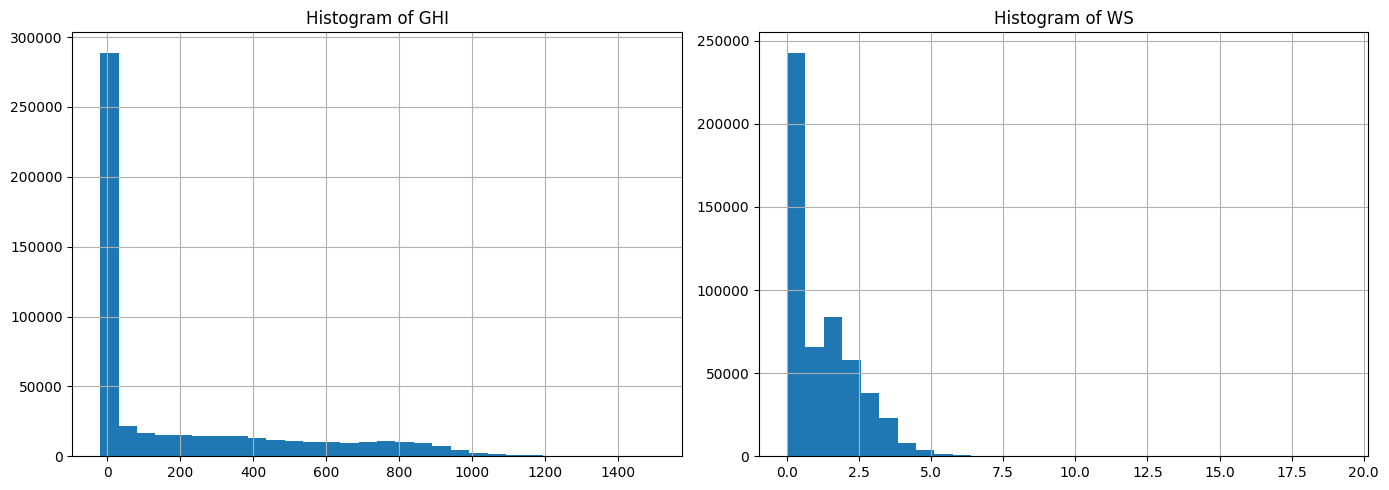

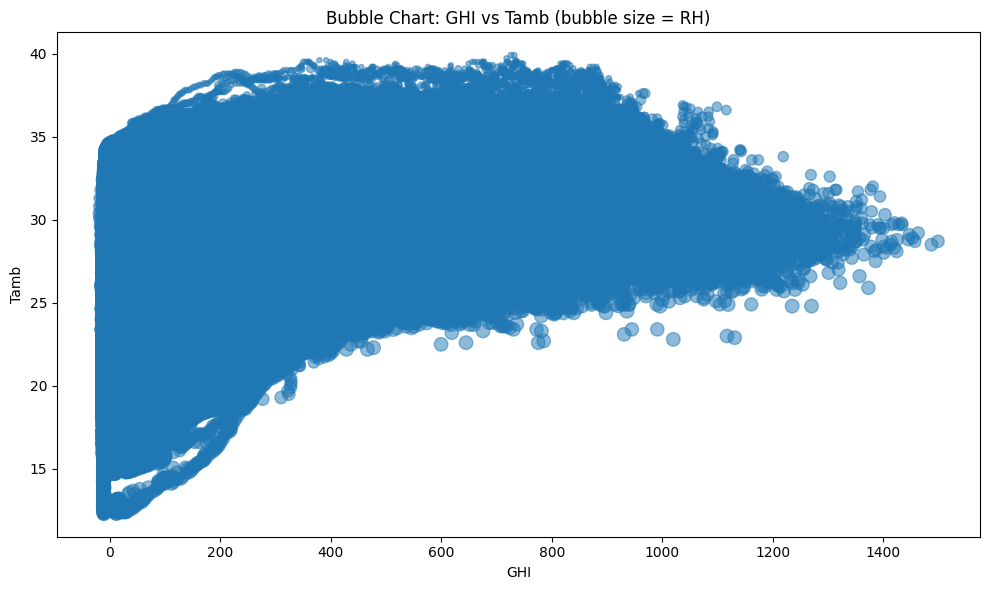

In [8]:


# ========== PLOTS ==========

# Time series plot
plt.figure(figsize=(12, 6))
df[["GHI", "DNI", "DHI", "Tamb"]].plot()
plt.title("Time Series: GHI, DNI, DHI, Tamb")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Monthly averages
df["Month"] = df.index.month
monthly_avg = df.groupby("Month")[["GHI", "DNI", "DHI", "Tamb"]].mean()
monthly_avg.plot(kind="bar", title="Monthly Averages")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

# Correlation heatmap
corr_cols = ["GHI", "DNI", "DHI", "Tamb"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Scatter plots: Wind speed/direction vs GHI
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x="WS", y="GHI", ax=axs[0])
axs[0].set_title("WS vs GHI")
sns.scatterplot(data=df, x="WSgust", y="GHI", ax=axs[1])
axs[1].set_title("WSgust vs GHI")
sns.scatterplot(data=df, x="WD", y="GHI", ax=axs[2])
axs[2].set_title("WD vs GHI")
plt.tight_layout()
plt.show()

# RH scatter plots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(data=df, x="RH", y="Tamb", ax=axs[0])
axs[0].set_title("RH vs Tamb")
sns.scatterplot(data=df, x="RH", y="GHI", ax=axs[1])
axs[1].set_title("RH vs GHI")
plt.tight_layout()
plt.show()

# Histograms
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
df["GHI"].hist(ax=axs[0], bins=30)
axs[0].set_title("Histogram of GHI")
df["WS"].hist(ax=axs[1], bins=30)
axs[1].set_title("Histogram of WS")
plt.tight_layout()
plt.show()
# Bubble chart: GHI vs Tamb, size by RH
plt.figure(figsize=(10, 6))
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("Bubble Chart: GHI vs Tamb (bubble size = RH)")
plt.tight_layout()
plt.show()